In [1]:
import os, sys
import re
import json
import glob
import datetime
from collections import Counter
from dotenv import load_dotenv
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

from nltk.corpus import stopwords


In [2]:
rpath = os.path.abspath('/home/user/Documents/10/w1/tellco')

if rpath not in sys.path:
    sys.path.insert(0, rpath)
    
import utils.data_manager as dataManager
import script.user_engagement_analysis as analysis

In [5]:
load_dotenv()
database_uri = os.getenv("CLEANED_DATABASE_URI")
dataM = dataManager.DataManager(database_uri)
data = dataM.read_table_to_dataframe('xdr_data')

Database connection established successfully.


In [6]:
userEngagement = analysis.UserEngagementAnalyzer(data)

In [7]:
aggregate_engagement_metrics= userEngagement.aggregate_engagement_metrics({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total UL (Bytes)': 'sum',
    # 'Total DL (Bytes)': 'sum'
},"MSISDN/Number")

In [8]:
#top 10 customers by Bearer Id	 
topTenCustomersBySessionFrequency = aggregate_engagement_metrics.nlargest(10, 'Bearer Id')
topTenCustomersBySessionFrequency

,MSISDN/Number,Bearer Id,Dur. (ms),Total UL (Bytes)
13526,3.362632e+10,1084,81324722.0,4.501432e+10
6437,3.361489e+10,17,9966898.0,6.894830e+08
13180,3.362578e+10,17,18553754.0,7.295774e+08
37052,3.365973e+10,16,4035428.0,6.242603e+08
76363,3.367588e+10,15,4865947.0,5.815688e+08
92923,3.376054e+10,15,9279434.0,7.034786e+08
65118,3.366716e+10,13,8744914.0,5.663264e+08
666,3.360313e+10,12,6287761.0,4.355876e+08
1279,3.360452e+10,12,5207990.0,3.917759e+08
13994,3.362708e+10,12,4703516.0,4.452519e+08


In [9]:
#top 10 customers by duration 
aggregate_engagement_metrics.nlargest(10, 'Dur. (ms)')

,MSISDN/Number,Bearer Id,Dur. (ms),Total UL (Bytes)
13526,3.362632e+10,1084,81324722.0,4.501432e+10
13180,3.362578e+10,17,18553754.0,7.295774e+08
6437,3.361489e+10,17,9966898.0,6.894830e+08
92923,3.376054e+10,15,9279434.0,7.034786e+08
65118,3.366716e+10,13,8744914.0,5.663264e+08
50281,3.366284e+10,9,6614270.0,4.064244e+08
57160,3.366469e+10,9,6288730.0,4.021808e+08
666,3.360313e+10,12,6287761.0,4.355876e+08
66029,3.366746e+10,6,5649882.0,2.662226e+08
92577,3.376041e+10,12,5321667.0,5.215189e+08


In [10]:
#top 10 customers by upload 
aggregate_engagement_metrics.nlargest(10, 'Total UL (Bytes)')

,MSISDN/Number,Bearer Id,Dur. (ms),Total UL (Bytes)
13526,3.362632e+10,1084,81324722.0,4.501432e+10
13180,3.362578e+10,17,18553754.0,7.295774e+08
92923,3.376054e+10,15,9279434.0,7.034786e+08
6437,3.361489e+10,17,9966898.0,6.894830e+08
37052,3.365973e+10,16,4035428.0,6.242603e+08
76363,3.367588e+10,15,4865947.0,5.815688e+08
65118,3.366716e+10,13,8744914.0,5.663264e+08
86455,3.369879e+10,11,5169128.0,5.303431e+08
92577,3.376041e+10,12,5321667.0,5.215189e+08
94654,3.376127e+10,10,3481629.0,4.964671e+08


In [11]:
##top 10 customers by download
# aggregate_engagement_metrics.nlargest(10, 'Total DL (Bytes)')

In [12]:
normalize_engagement_metrics = userEngagement.normalize_engagement_metrics(
    aggregate_engagement_metrics
   )
normalize_engagement_metrics

array([[-3.98480544e-03, -1.18471887e-01, -9.73830373e-02,
        -1.52545579e-01],
       [-3.98480542e-03, -1.18471887e-01,  1.11147498e-01,
        -1.52184117e-01],
       [-3.98480516e-03, -1.18471887e-01, -3.83925902e-02,
        -1.29642515e-01],
       ...,
       [ 1.09084769e+00, -1.18471887e-01,  2.36148969e+00,
        -1.43797390e-01],
       [ 1.16617210e+02, -1.18471887e-01,  3.43243180e-01,
        -7.54289882e-03],
       [ 3.05374461e+02, -1.18471887e-01,  2.33711318e+00,
         1.92281131e-02]])

In [13]:
classify_engagement_clusters = userEngagement.classify_engagement_clusters(normalize_engagement_metrics)

/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
compute_cluster_statistics = userEngagement.compute_cluster_statistics(
aggregate_engagement_metrics,classify_engagement_clusters,{
    'Bearer Id': ['min', 'max', 'mean', 'sum'],
    'Dur. (ms)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum'],
    # 'Total DL (Bytes)': ['min', 'max', 'mean', 'sum'],
    
       
})
compute_cluster_statistics

Bearer Id                             Dur. (ms)              \
              min   max        mean     sum         min         max   
cluster                                                               
0               1    17     1.39364  148916      7142.0  18553754.0   
1            1084  1084  1084.00000    1084  81324722.0  81324722.0   
2               1     1     1.00000       1    869844.0    869844.0   

                                    Total UL (Bytes)                \
                 mean           sum              min           max   
cluster                                                              
0        1.460795e+05  1.560918e+10     2.866892e+06  7.295774e+08   
1        8.132472e+07  8.132472e+07     4.501432e+10  4.501432e+10   
2        8.698440e+05  8.698440e+05     6.045605e+07  6.045605e+07   

                                     
                 mean           sum  
cluster                              
0        5.730366e+07  6.123126e+12  
1        4.501432e+10  4.501432e+10  
2        6.045605e+07  6.045605e+07

In [15]:
userEngagement.visualize_cluster_statistics(classify_engagement_clusters)

An error occurred during visualization: 'numpy.ndarray' object has no attribute 'index'


In [16]:
userEngagement.aggregate_user_traffic_per_application("MSISDN/Number")

MSISDN/Number
3.362632e+10    1.558994e+12
3.376389e+10    7.805835e+10
3.376273e+10    7.483878e+10
3.365912e+10    6.707794e+10
3.376392e+10    6.684966e+10
3.365884e+10    5.265407e+10
3.366048e+10    5.199561e+10
3.366233e+10    5.158480e+10
3.366946e+10    4.905952e+10
3.365049e+10    4.822231e+10
dtype: float64

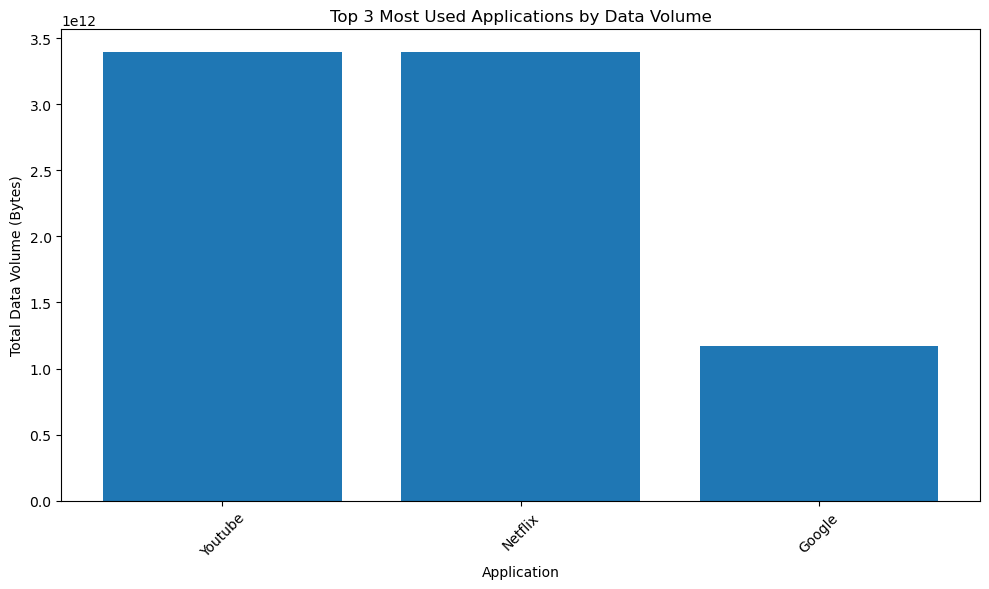

In [29]:
userEngagement.plot_top_applications(data)

/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user/anaconda3/lib/pyt

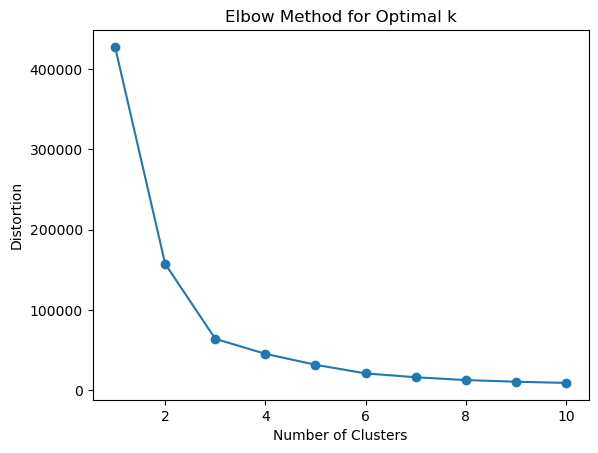

In [31]:
userEngagement.optimize_k(normalize_engagement_metrics)